###Imports




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn import utils
%matplotlib inline

In [2]:
RegData  = np.genfromtxt("RegData.csv",delimiter = ",")
x_RegPoints = RegData[:,0]
y_RegPoints = RegData[:,1]

To have a dataset or set of data points, the student must generate a pair of arrays X and y with the values in X equally distributed between 0 and 20 and the values in y such that: yi = a*xi + b (and a = -2, b = 1)

In [3]:
x_points = np.linspace(0,20)
y_points = -2*x_points +1

## Momentum Gradient descent ##
>Momemtum solves the **vanishing gradient** problem and relies on history to do so

>**Disadvange**: Oscillates around the minimum valley making "U-turns" near the minima (however it converges faseter than vanilla GD)

In [4]:
def momentum_BatchGD(x,y,learning_rate = 0.0001,Epoch = 1000,gamma = 0.9):
  theta0,theta1 ,vt0,vt1= 0,0,0,0
  m = len(y)
  costs,thetas0,thetas1 ,hypothesis= [],[],[],[]
  for i in range(Epoch):
    #calculate hypothesis
    y_hat = theta0 + theta1*x
    hypothesis.append(y_hat)
    #calculate error
    e = y_hat-y
    #calculate cost function
    cost = np.sum(np.square(e)) /(2*m)
    costs.append(cost)
    #calculate gradient
    gradient0 = np.sum(e)/m
    gradient1 = np.dot(e.T,x)/m
    #update thetas with momentum
    vt0 = gamma * vt0 + learning_rate * gradient0
    vt1 = gamma * vt1 + learning_rate * gradient1
    theta0 = theta0 - vt0
    theta1 = theta1 - vt1
    thetas0.append(theta0)
    thetas1.append(theta1)
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break

  return costs,thetas0,thetas1,hypothesis

In [5]:
mt_costs,mt_thetas0,mt_thetas1, mt_hypothesis= momentum_BatchGD(x_RegPoints,y_RegPoints)

stopped at iteration 64


Cost function vs Epoch 





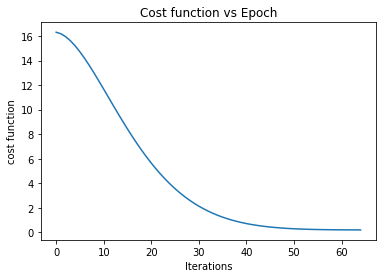

In [6]:
plt.plot(mt_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

Cost function vs theta0 





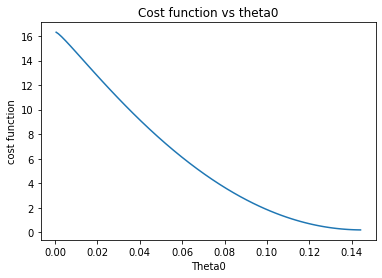

In [7]:
plt.plot(mt_thetas0,mt_costs);
plt.xlabel("Theta0")
plt.ylabel("cost function")
plt.title("Cost function vs theta0");

Cost function vs theta1 

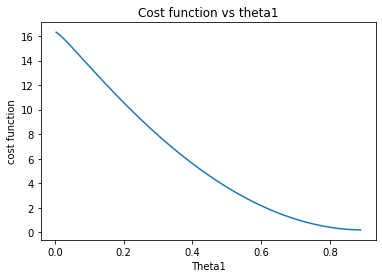

In [8]:
plt.plot(mt_thetas1,mt_costs)
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

#### Model accuracy ####

In [9]:
r2_score(y_RegPoints,mt_thetas0[-1]+mt_thetas1[-1]*x_RegPoints)

0.7461284125806267

## NAG ##
>**NAG** "Nesterov accelerated GD" is used to solve the overshooting problem done tby the momentum

>next v(t) in NAG is smaller than momentum

In [10]:
def NAG_batchGD(x,y,learning_rate= 0.001,Epoch = 1000 , gamma = 0.9):
  theta0,theta1,vt0,vt1,theta0_temp,theta1_temp = 0,0,0,0,0,0
  m = len(y)
  costs,thetas0,thetas1 = [],[],[]
  for i in range(Epoch):
    #calculate the hypothesis
    y_hat = theta0 + theta1 * x
    #calculate error
    e = y_hat - y
    #calculate cost
    cost = np.sum(e**2)/(2*m)
    costs.append(cost)
    #update theta temp 
    theta0_temp = theta0 - gamma * vt0
    theta1_temp = theta1 - gamma * vt1
    #update hypothesis temp
    hypothesis_temp = theta0_temp + theta1_temp *x
    #update error temp
    e_temp = hypothesis_temp - y
    #update gradients
    gradient_temp0 = (np.sum(e_temp)) / m 
    gradient_temp1 = (np.dot(e_temp.T,x))/m
    #update thetas
    theta0 = theta0_temp - learning_rate * gradient_temp0
    theta1 = theta1_temp - learning_rate * gradient_temp1
    thetas0.append(theta0)
    thetas1.append(theta1)
    #update v's
    vt0 = gamma * vt0 + learning_rate * gradient_temp0
    vt1 = gamma * vt1 + learning_rate * gradient_temp1
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break
  return costs, thetas0, thetas1

In [11]:
nag_costs,nag_thetas0, nag_thetas1 = NAG_batchGD(x_RegPoints,y_RegPoints)

stopped at iteration 43



Cost function vs Epoch


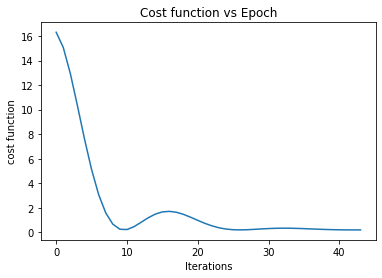

In [12]:
plt.plot(nag_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

Cost function vs theta0 

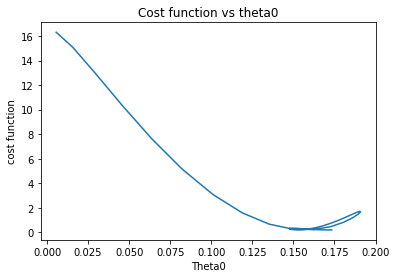

In [13]:
plt.plot(nag_thetas0,nag_costs);
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");


Cost function vs theta1 ##


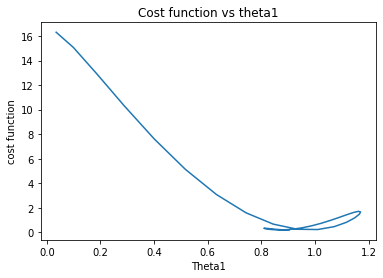

In [14]:
plt.plot(nag_thetas1,nag_costs)
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

Model accuracy 

In [15]:
r2_score(y_RegPoints, nag_thetas0[-1]+ nag_thetas1[-1]*x_RegPoints)

0.7463380622828757